<a href="https://colab.research.google.com/github/ola-sumbo/Hamoye-and-ML-with-Ude/blob/master/Keras_and_Tensorflow_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# Import necessary packages in R it is called libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

#Get ur data from available dataset in the system
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print("Training data : {}, {}".format(train_images.shape, train_labels.shape))

Training data : (60000, 28, 28), (60000,)


In [20]:
print("Test data : {},{}".format(test_images.shape, test_labels.shape))
class_labels = np.unique(train_labels)
print("There are {} classes in the dataset. They are: {}".format(len(class_labels),(class_labels)))

Test data : (10000, 28, 28),(10000,)
There are 10 classes in the dataset. They are: [0 1 2 3 4 5 6 7 8 9]


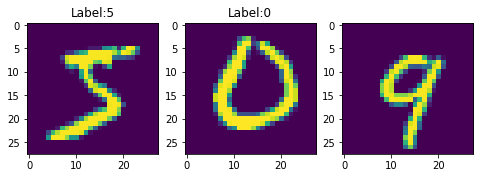

In [21]:
plt.figure(figsize=(8,5))

plt.subplot(1,3,1)
plt.imshow(train_images[0])
plt.title("Label:{}".format(train_labels[0]))

plt.subplot(1,3,2)
plt.imshow(train_images[2500])
plt.title("Label:{}".format(train_labels[2500]))

plt.subplot(1,3,3)
plt.imshow(test_images[12]) # plot image show

plt.show( )

**We scale our dataset to range between 0 and 1. In this dataset, the pixel values range from 0 to 255. Dividing the data by 255 scales to the required range **

In [22]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [23]:
# Splitting training data to training and validation 
x_train = train_images[0:50000]
x_val = train_images[50000:]
y_train = train_labels[0:50000]
y_val = train_labels[50000:]

In [24]:
print("x_train: {}".format(x_train.shape))
print("x_val: {}".format(x_val.shape))
print("y_train: {}".format(y_train.shape))
print("y_value: {}".format(y_val.shape))

x_train: (50000, 28, 28)
x_val: (10000, 28, 28)
y_train: (50000,)
y_value: (10000,)


In [25]:
# Encode Labels to categorical variables 
from tensorflow.keras.utils import to_categorical
no_labels = 10
y_train = to_categorical(y_train, no_labels)
y_val = to_categorical(y_val, no_labels)
y_test = to_categorical(test_labels, no_labels)

In [26]:
# Reshape data from 28 * 28 array to a single array
new_dimension = np.prod(train_images.shape[1:]) #np.prod multiplies the prod of the arrays
x_train = x_train.reshape(x_train.shape[0], new_dimension) 
x_val = x_val.reshape(x_val.shape[0], new_dimension)
test_images = test_images.reshape(test_images.shape[0], new_dimension)

print("x_train: {}".format(x_train.shape))
print("x_val: {}".format(x_val.shape))
print("test_images: {}".format(test_images))

x_train: (50000, 784)
x_val: (10000, 784)
test_images: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


**Activation functions and Neural Network parameter**

In [27]:
#inputs 
# placeholders are not enabled in tf2
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
X = tf.placeholder (tf.float32, [None, new_dimension])
Y = tf.placeholder (tf.float32, [None, no_labels])

In [28]:
# Create your model architecture 
def multilayer_perceptron(x, no_classes, first_layer_neurons=256, second_layer_neurons=128):
  # first layer
  first_weight = tf.Variable(tf.random_uniform([new_dimension, first_layer_neurons]))
  first_bias = tf.Variable(tf.zeros([first_layer_neurons]))
  first_layer_output = tf.nn.relu(tf.add(tf.matmul(x, first_weight), first_bias))

  # second layer 
  second_weight = tf.Variable(tf.random_uniform([first_layer_neurons, second_layer_neurons]))
  second_bias = tf.Variable(tf.zeros([second_layer_neurons]))
  second_layer_output = tf.nn.relu(tf.add(tf.matmul(first_layer_output, second_weight), second_bias))

  #output layer 
  final_weight = tf.Variable(tf.random_uniform([second_layer_neurons, no_classes]))
  final_bias = tf.Variable(tf.zeros([no_classes]))
  logits = tf.add(tf.matmul(second_layer_output, final_weight), final_bias)

  return logits

logits = multilayer_perceptron(X, no_labels)

In [29]:
learning_rate = 0.01
# we define the loss and optimiser for the network 
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels =Y))
optimiser = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimiser.minimize(loss_op)

#initialise the variables
init = tf.global_variables_initializer()
epochs = 20
batch_size = 1000
iteration = len(x_train)// batch_size

#train model
with tf.Session() as session:
  session.run(init)
  for epoch in range(epochs):
    average_cost = 0
    start, end = 0, batch_size

    for i in range(iteration):
      batch_x, batch_y = x_train[start: end], y_train[start: end]
      _, loss = session.run([train_op, loss_op], feed_dict={X: batch_x, Y: batch_y})
      start+= batch_size
      end+= batch_size
      # average loss
      average_cost+= loss/iteration
    print("Epoch======={}".format(epoch))

    # Evaluate the model
    prediction = tf.nn.softmax(logits)
    ground_truth = tf.equal(tf.argmax(prediction,1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(ground_truth, "float"))
  print("Accuracy: {}".format(accuracy.eval({X: test_images, Y: y_test})))


Epoch=======0
Epoch=======1
Epoch=======2
Epoch=======3
Epoch=======4
Epoch=======5
Epoch=======6
Epoch=======7
Epoch=======8
Epoch=======9
Epoch=======10
Epoch=======11
Epoch=======12
Epoch=======13
Epoch=======14
Epoch=======15
Epoch=======16
Epoch=======17
Epoch=======18
Epoch=======19
Accuracy: 0.9111999869346619


**Optimization for training deep neural networks**

In [30]:
# Building sequential feed forward network in Keras

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# Building model object
model = Sequential()
# Build the input and the hidden layers 
model.add(Dense(256, activation ='relu', input_shape = (new_dimension,)))
model.add(Dense(128, activation ='relu'))
# Build the output layer
model.add(Dense(no_labels, activation ='softmax'))

In [31]:
model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, metrics =['accuracy'])

# Having compiled our model, we will start the training process. We specify the nos of times to iterate on the whole training set ie epochs and 
# how many samples we use for one update to the model's weights ie batch size

In [32]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=1000)
test_loss, test_accuracy = model.evaluate(test_images, y_test)
print ('Test loss: {}'.format(test_loss))
print('Test_accuracy: {}'.format(test_accuracy))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 1s 30us/sample - loss: 0.7023 - acc: 0.8106 - val_loss: 0.2559 - val_acc: 0.9270
Epoch 2/20
50000/50000 [==============================] - 1s 29us/sample - loss: 0.2305 - acc: 0.9332 - val_loss: 0.1806 - val_acc: 0.9493
Epoch 3/20
50000/50000 [==============================] - 1s 29us/sample - loss: 0.1672 - acc: 0.9518 - val_loss: 0.1449 - val_acc: 0.9599
Epoch 4/20
50000/50000 [==============================] - 1s 29us/sample - loss: 0.1318 - acc: 0.9624 - val_loss: 0.1240 - val_acc: 0.9653
Epoch 5/20
50000/50000 [==============================] - 1s 30us/sample - loss: 0.1076 - acc: 0.9689 - val_loss: 0.1145 - val_acc: 0.9673
Epoch 6/20
50000/50000 [==============================] - 1s 29us/sample - loss: 0.0898 - acc: 0.9744 - val_loss: 0.1022 - val_acc: 0.9699
Epoch 7/20
50000/50000 [==============================] - 1s 29us/sample - loss: 0.0744 - acc: 0.9790 - val_loss: 0.

Text(0.5, 1.0, 'Loss Curves - before regularisation')

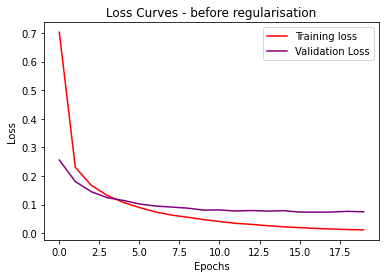

In [33]:
# Checking for overfitting graphically
plt.figure()
plt.plot(history.history['loss'], 'red')
plt.plot(history.history['val_loss'], 'purple')
plt.legend(['Training loss', 'Validation Loss']) #signified above as loss and val_loss
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves - before regularisation')


**Making Predictions**

In [34]:
# Using our model to predict
predictions = model.predict([test_images]) # Make predictions
print(np.argmax(predictions[1000]))

9


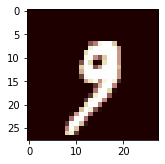

In [35]:
# to verify the image will turn out to be as predicted ie 9
# recall input data sent to the network was flattened for the purpose of learning to a vector with length 784. 
# To view this prediction,  we need to convert it back to the size of 28 by 28 pixels.
plt.figure(figsize=(8,5)) 
plt.subplot(1, 3, 1)
plt.imshow(test_images[1000].reshape(28, 28), cmap='pink') # Import the image
plt.show()

In [44]:
# another case of prediction by choosing test_images[6700]
predictions = model.predict([test_images]) #make predictions
print(np.argmax(predictions[6700])) # print out the number

4


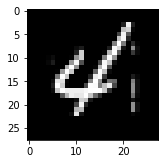

In [45]:
plt.figure(figsize=(8, 5))
plt.subplot(1, 3,1)
plt.imshow(test_images[6700].reshape(28, 28), cmap ='gray')
plt.show() # show images 